# ANÁLISE DE REGRESSÃO LINEAR SIMPLES - NANOFLUIDOS HÍBRIDOS

Predição de densidade usando densidade do fluido base.

**Objetivo:** Implementar regressão linear simples para predição da densidade de nanofluidos híbridos.

## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuração dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("ANÁLISE DE REGRESSÃO LINEAR SIMPLES - NANOFLUIDOS HÍBRIDOS")
print("="*70)

ANÁLISE DE REGRESSÃO LINEAR SIMPLES - NANOFLUIDOS HÍBRIDOS


## 2. Carregamento e Exploração dos Dados

In [2]:
print("\nCARREGANDO DADOS...")

# Carregamento do dataset
try:
    df = pd.read_csv("dataset/Density_Prediction_Dataset.csv")
    print(f"Dataset carregado com sucesso!")
    print(f"Dimensões: {df.shape[0]} amostras x {df.shape[1]} variáveis")
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome do arquivo.")
    raise

# Exploração inicial
print(f"\nINFORMAÇÕES BÁSICAS DO DATASET:")
print(f"   • Total de amostras: {len(df)}")
print(f"   • Colunas disponíveis: {list(df.columns)}")
print(f"   • Valores nulos: {df.isnull().sum().sum()}")

# Mostrar primeiras linhas
print(f"\nPRIMEIRAS 5 LINHAS DO DATASET:")
display(df.head())


CARREGANDO DADOS...
Dataset carregado com sucesso!
Dimensões: 436 amostras x 10 variáveis

INFORMAÇÕES BÁSICAS DO DATASET:
   • Total de amostras: 436
   • Colunas disponíveis: ['Nano Particle', 'Base Fluid', 'Temperature (°C)', 'Volume Concentration (ϕ)', 'Density of Nano Particle 1 (ρnp)', 'Density of Nano Particle 2 (ρnp)', 'Density of Base Fluid (ρbf)', 'Volume Mixture of Particle 1', 'Volume Mixture of Particle 2', 'Density (ρ)']
   • Valores nulos: 0

PRIMEIRAS 5 LINHAS DO DATASET:


,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000


In [3]:
# Estatísticas descritivas das variáveis principais
print(f"\nESTATÍSTICAS DESCRITIVAS:")
cols_interesse = ["Density of Base Fluid (ρbf)", "Density (ρ)"]
display(df[cols_interesse].describe().round(4))


ESTATÍSTICAS DESCRITIVAS:


,Density of Base Fluid (ρbf),Density (ρ)
count,436.0000,436.0000
mean,998.2439,1016.3673
std,17.7231,22.6950
min,977.6000,983.0100
25%,990.2200,998.6873
50%,994.0800,1010.3191
75%,997.1300,1028.1730
max,1063.0000,1093.4320


## 3. ETAPA 1: Seleção das Variáveis

Seleção das colunas para regressão linear simples:  
**X (independente):** Density of Base Fluid (ρbf)  
**Y (dependente):** Density (ρ)

In [4]:
print("ETAPA 1: SELEÇÃO DAS VARIÁVEIS")
print("="*50)

# Seleção das colunas específicas
X = df["Density of Base Fluid (ρbf)"].values
Y = df["Density (ρ)"].values

print(f"Variável X (independente): Density of Base Fluid (ρbf)")
print(f"Variável Y (dependente): Density (ρ)")
print(f"Número de observações: {len(X)}")

# Verificar valores válidos
mask_validos = ~(np.isnan(X) | np.isnan(Y))
X = X[mask_validos]
Y = Y[mask_validos]
print(f"Observações válidas (sem NaN): {len(X)}")

# Divisão 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, shuffle=True
)

print(f"\nDivisão dos dados:")
print(f"Treino: {len(X_train)} amostras (70%)")
print(f"Teste: {len(X_test)} amostras (30%)")

ETAPA 1: SELEÇÃO DAS VARIÁVEIS
Variável X (independente): Density of Base Fluid (ρbf)
Variável Y (dependente): Density (ρ)
Número de observações: 436
Observações válidas (sem NaN): 436

Divisão dos dados:
Treino: 305 amostras (70%)
Teste: 131 amostras (30%)


## 4. ETAPA 2: Cálculos da Regressão Linear

Aplicação das fórmulas da regressão linear simples conforme especificado.

In [5]:
print("ETAPA 2: CÁLCULOS DA REGRESSÃO LINEAR")
print("="*50)

# Cálculo das médias
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

print(f"Médias:")
print(f"x̄ = {x_mean:.4f}")
print(f"ȳ = {y_mean:.4f}")

ETAPA 2: CÁLCULOS DA REGRESSÃO LINEAR
Médias:
x̄ = 996.4048
ȳ = 1014.7974


In [6]:
# PARTE 1: Cálculo dos coeficientes
print("\n--- PARTE 1: Coeficientes da Regressão ---")

# Fórmula: b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²
numerador_b1 = np.sum((X_train - x_mean) * (y_train - y_mean))
denominador_b1 = np.sum((X_train - x_mean)**2)
b1 = numerador_b1 / denominador_b1

print(f"b₁ (Coeficiente angular/slope):")
print(f"  Fórmula: b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²")
print(f"  b₁ = {b1:.6f}")

# Fórmula: b₀ = ȳ - b₁x̄
b0 = y_mean - b1 * x_mean
print(f"\nb₀ (Coeficiente linear/intercepto):")
print(f"  Fórmula: b₀ = ȳ - b₁x̄")
print(f"  b₀ = {b0:.6f}")

# Equação da reta de regressão: ŷ = b₁x + b₀
print(f"\nEquação da reta de regressão:")
print(f"  ŷ = {b1:.6f}x + {b0:.6f}")

# Predições no conjunto de teste
y_pred = b1 * X_test + b0
print(f"\nPredições realizadas para {len(X_test)} amostras de teste")


--- PARTE 1: Coeficientes da Regressão ---
b₁ (Coeficiente angular/slope):
  Fórmula: b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²
  b₁ = 1.012449

b₀ (Coeficiente linear/intercepto):
  Fórmula: b₀ = ȳ - b₁x̄
  b₀ = 5.988745

Equação da reta de regressão:
  ŷ = 1.012449x + 5.988745

Predições realizadas para 131 amostras de teste


## 5. Cálculo das Métricas de Erro

In [7]:
print("--- PARTE 2: Soma dos Quadrados dos Erros (SSE/RSS) ---")

# Fórmula: SSE = Σ(yᵢ - ŷᵢ)²
SSE = np.sum((y_test - y_pred)**2)
print(f"SSE (Soma dos quadrados dos erros):")
print(f"  Fórmula: SSE = Σ(yᵢ - ŷᵢ)²")
print(f"  SSE = {SSE:.6f}")

print(f"\n--- PARTE 3: Métricas de Erro ---")

# Fórmula: MSE = (1/n) * SSE
n_test = len(y_test)
MSE = SSE / n_test
print(f"MSE (Erro médio quadrático):")
print(f"  Fórmula: MSE = (1/n) * SSE")
print(f"  MSE = {MSE:.6f}")

# Fórmula: RMSE = √MSE
RMSE = np.sqrt(MSE)
print(f"RMSE (Raiz do erro médio quadrático):")
print(f"  Fórmula: RMSE = √MSE")
print(f"  RMSE = {RMSE:.6f}")

# Cálculo adicional do R² para avaliação
TSS = np.sum((y_test - np.mean(y_test))**2)
R_squared = 1 - (SSE / TSS)
print(f"\nMétrica adicional:")
print(f"R² (Coeficiente de determinação) = {R_squared:.6f}")

--- PARTE 2: Soma dos Quadrados dos Erros (SSE/RSS) ---
SSE (Soma dos quadrados dos erros):
  Fórmula: SSE = Σ(yᵢ - ŷᵢ)²
  SSE = 28581.925790

--- PARTE 3: Métricas de Erro ---
MSE (Erro médio quadrático):
  Fórmula: MSE = (1/n) * SSE
  MSE = 218.182640
RMSE (Raiz do erro médio quadrático):
  Fórmula: RMSE = √MSE
  RMSE = 14.771007

Métrica adicional:
R² (Coeficiente de determinação) = 0.671908


## 6. Resumo dos Resultados

In [8]:
print("RESUMO DOS RESULTADOS")
print("="*50)
print(f"{'Métrica':<30} {'Valor':<15}")
print("-"*50)
print(f"{'Coeficiente Angular (b₁)':<30} {b1:.6f}")
print(f"{'Intercepto (b₀)':<30} {b0:.6f}")
print(f"{'SSE (Soma Quad. Erros)':<30} {SSE:.6f}")
print(f"{'MSE (Erro Médio Quad.)':<30} {MSE:.6f}")
print(f"{'RMSE (Raiz MSE)':<30} {RMSE:.6f}")
print(f"{'R² (Coef. Determinação)':<30} {R_squared:.6f}")

print(f"\nEquação Final:")
print(f"ŷ = {b1:.6f}x + {b0:.6f}")

RESUMO DOS RESULTADOS
Métrica                        Valor          
--------------------------------------------------
Coeficiente Angular (b₁)       1.012449
Intercepto (b₀)                5.988745
SSE (Soma Quad. Erros)         28581.925790
MSE (Erro Médio Quad.)         218.182640
RMSE (Raiz MSE)                14.771007
R² (Coef. Determinação)        0.671908

Equação Final:
ŷ = 1.012449x + 5.988745


## 7. Visualizações dos Resultados

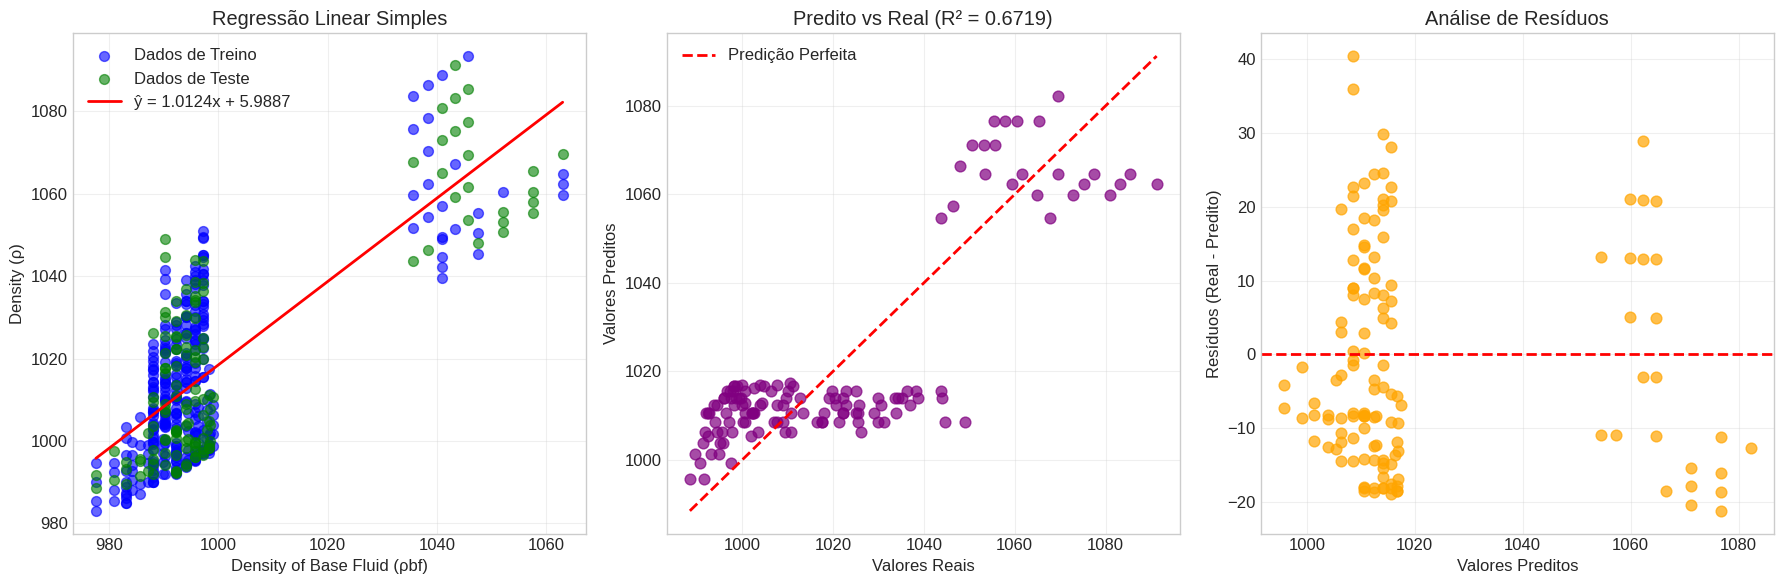

In [9]:
# Criar figura com subplots - 3 gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Dispersão + Linha de Regressão
axes[0].scatter(X_train, y_train, alpha=0.6, color='blue', s=50, label='Dados de Treino')
axes[0].scatter(X_test, y_test, alpha=0.6, color='green', s=50, label='Dados de Teste')

# Linha de regressão
x_linha = np.linspace(X.min(), X.max(), 100)
y_linha = b1 * x_linha + b0
axes[0].plot(x_linha, y_linha, color='red', linewidth=2, 
             label=f'ŷ = {b1:.4f}x + {b0:.4f}')

axes[0].set_xlabel('Density of Base Fluid (ρbf)')
axes[0].set_ylabel('Density (ρ)')
axes[0].set_title('Regressão Linear Simples')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Predito vs Real
axes[1].scatter(y_test, y_pred, alpha=0.7, color='purple', s=60)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
             label='Predição Perfeita')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Valores Preditos')
axes[1].set_title(f'Predito vs Real (R² = {R_squared:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Análise de Resíduos
residuos = y_test - y_pred
axes[2].scatter(y_pred, residuos, alpha=0.7, color='orange', s=60)
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Valores Preditos')
axes[2].set_ylabel('Resíduos (Real - Predito)')
axes[2].set_title('Análise de Resíduos')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Interpretação dos Resultados

In [10]:
print("INTERPRETAÇÃO DOS RESULTADOS")
print("="*50)

print(f"\nCoeficientes da Regressão:")
print(f"• b₁ = {b1:.6f}: Para cada unidade de aumento na densidade")
print(f"  do fluido base, a densidade do nanofluido aumenta {b1:.6f} unidades")
print(f"• b₀ = {b0:.6f}: Valor estimado da densidade quando ρbf = 0")

print(f"\nMétricas de Erro:")
print(f"• SSE = {SSE:.6f}: Soma total dos quadrados dos erros")
print(f"• MSE = {MSE:.6f}: Erro quadrático médio")
print(f"• RMSE = {RMSE:.6f}: Erro médio em unidades originais")

print(f"\nQualidade do Modelo:")
if R_squared >= 0.8:
    qualidade = "Excelente"
elif R_squared >= 0.6:
    qualidade = "Boa"
elif R_squared >= 0.4:
    qualidade = "Moderada"
else:
    qualidade = "Fraca"

print(f"• R² = {R_squared:.4f} ({qualidade})")
print(f"• O modelo explica {R_squared*100:.2f}% da variabilidade dos dados")

print(f"\nFórmulas Aplicadas:")
print(f"1. b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²")
print(f"2. b₀ = ȳ - b₁x̄")
print(f"3. ŷ = b₁x + b₀")
print(f"4. SSE = Σ(yᵢ - ŷᵢ)²")
print(f"5. MSE = (1/n) × SSE")
print(f"6. RMSE = √MSE")

print(f"\nEquação Final: ŷ = {b1:.6f}x + {b0:.6f}")

INTERPRETAÇÃO DOS RESULTADOS

Coeficientes da Regressão:
• b₁ = 1.012449: Para cada unidade de aumento na densidade
  do fluido base, a densidade do nanofluido aumenta 1.012449 unidades
• b₀ = 5.988745: Valor estimado da densidade quando ρbf = 0

Métricas de Erro:
• SSE = 28581.925790: Soma total dos quadrados dos erros
• MSE = 218.182640: Erro quadrático médio
• RMSE = 14.771007: Erro médio em unidades originais

Qualidade do Modelo:
• R² = 0.6719 (Boa)
• O modelo explica 67.19% da variabilidade dos dados

Fórmulas Aplicadas:
1. b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²
2. b₀ = ȳ - b₁x̄
3. ŷ = b₁x + b₀
4. SSE = Σ(yᵢ - ŷᵢ)²
5. MSE = (1/n) × SSE
6. RMSE = √MSE

Equação Final: ŷ = 1.012449x + 5.988745


# ANÁLISE DE REGRESSÃO LINEAR MÚLTIPLA COM GRADIENT DESCENT - NANOFLUIDOS HÍBRIDOS

Implementação de regressão linear múltipla usando Gradient Descent para otimização dos coeficientes.

In [25]:
from sklearn.preprocessing import LabelEncoder

print("ANÁLISE DE REGRESSÃO LINEAR MÚLTIPLA COM GRADIENT DESCENT")
print("="*70)

# Função de custo (MSE)
def compute_cost(X, y, theta):
    """
    Calcula o custo (MSE) para um dado conjunto de parâmetros theta
    """
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Função para calcular o gradiente
def compute_gradient(X, y, theta):
    """
    Calcula o gradiente da função de custo em relação aos parâmetros theta
    """
    m = len(y)
    predictions = X @ theta
    gradient = (1/m) * X.T @ (predictions - y)
    return gradient

# Algoritmo Gradient Descent
def gradient_descent(X, y, theta_init, alpha, num_iterations):
    """
    Implementa o algoritmo Gradient Descent
    """
    theta = theta_init.copy()
    cost_history = []
    theta_history = []
    
    for i in range(num_iterations):
        # Calcular custo atual
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
        
        # Calcular gradiente
        gradient = compute_gradient(X, y, theta)
        
        # Atualizar parâmetros
        theta = theta - alpha * gradient
        
        # Print a cada 200 iterações
        if i % 200 == 0:
            print(f"Iteração {i:4d}: Custo = {cost:.6f}")
    
    return theta, cost_history, theta_history

print("\nCARREGANDO DADOS...")

# Carregamento do dataset
try:
    df_multi = pd.read_csv("dataset/Density_Prediction_Dataset.csv")
    print(f"Dataset carregado com sucesso!")
    print(f"Dimensões: {df_multi.shape[0]} amostras x {df_multi.shape[1]} variáveis")
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome do arquivo.")
    raise

# Codificação das variáveis categóricas
le_base = LabelEncoder() 
le_nano = LabelEncoder()
df_multi["Base Fluid"] = le_base.fit_transform(df_multi["Base Fluid"]) 
df_multi["Nano Particle"] = le_nano.fit_transform(df_multi["Nano Particle"])

print("Implementação do Gradient Descent e preparação dos dados concluída!")

ANÁLISE DE REGRESSÃO LINEAR MÚLTIPLA COM GRADIENT DESCENT

CARREGANDO DADOS...
Dataset carregado com sucesso!
Dimensões: 436 amostras x 10 variáveis
Implementação do Gradient Descent e preparação dos dados concluída!


In [26]:
print("ETAPA 1: SELEÇÃO DAS VARIÁVEIS PARA REGRESSÃO MÚLTIPLA")
print("="*60)

# Seleção das variáveis independentes (múltiplas)
variaveis_independentes = [
    "Density of Base Fluid (ρbf)",
    "Volume Mixture of Particle 1", 
    "Volume Mixture of Particle 2",
    "Base Fluid",
    "Nano Particle"
]

# Variável dependente
variavel_dependente = "Density (ρ)"

print(f"Variáveis independentes:")
for i, var in enumerate(variaveis_independentes, 1):
    print(f"  X{i}: {var}")
print(f"Variável dependente: Y = {variavel_dependente}")

# Construção das matrizes X e Y
X_multi = df_multi[variaveis_independentes].values
Y_multi = df_multi[variavel_dependente].values

print(f"\nDimensões:")
print(f"X: {X_multi.shape}")
print(f"Y: {Y_multi.shape}")

# Verificar e remover valores NaN
mask_validos_multi = ~(np.isnan(X_multi).any(axis=1) | np.isnan(Y_multi))
X_multi = X_multi[mask_validos_multi]
Y_multi = Y_multi[mask_validos_multi]

print(f"Observações válidas (sem NaN): {len(X_multi)}")

# Divisão treino/teste
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, Y_multi, test_size=0.3, random_state=42, shuffle=True
)

print(f"\nDivisão dos dados:")
print(f"Treino: {len(X_train_multi)} amostras")
print(f"Teste: {len(X_test_multi)} amostras")

ETAPA 1: SELEÇÃO DAS VARIÁVEIS PARA REGRESSÃO MÚLTIPLA
Variáveis independentes:
  X1: Density of Base Fluid (ρbf)
  X2: Volume Mixture of Particle 1
  X3: Volume Mixture of Particle 2
  X4: Base Fluid
  X5: Nano Particle
Variável dependente: Y = Density (ρ)

Dimensões:
X: (436, 5)
Y: (436,)
Observações válidas (sem NaN): 436

Divisão dos dados:
Treino: 305 amostras
Teste: 131 amostras


In [27]:
print("ETAPA 2: APLICAÇÃO DO GRADIENT DESCENT - REGRESSÃO MÚLTIPLA")
print("="*60)

# Preparar dados para Gradient Descent
X_gd_multi = np.column_stack((np.ones(len(X_train_multi)), X_train_multi))
y_gd_multi = y_train_multi

# Normalizar todas as features (exceto a coluna de 1s) - importante para convergência
X_gd_multi_norm = X_gd_multi.copy()
X_means = np.mean(X_gd_multi[:, 1:], axis=0)
X_stds = np.std(X_gd_multi[:, 1:], axis=0)

for i in range(1, X_gd_multi.shape[1]):
    X_gd_multi_norm[:, i] = (X_gd_multi[:, i] - X_means[i-1]) / X_stds[i-1]

print(f"Matriz de design X normalizada: {X_gd_multi_norm.shape}")

# Parâmetros do Gradient Descent
theta_init_multi = np.zeros(X_gd_multi_norm.shape[1])
alpha_multi = 0.01  # Taxa de aprendizado
num_iterations_multi = 1500  # Número de iterações

print(f"\nParâmetros do Gradient Descent:")
print(f"  Taxa de aprendizado (α): {alpha_multi}")
print(f"  Número de iterações: {num_iterations_multi}")
print(f"  Número de parâmetros: {len(theta_init_multi)}")

# Executar Gradient Descent
print(f"\nExecutando Gradient Descent...")
theta_final_multi, cost_history_multi, theta_history_multi = gradient_descent(
    X_gd_multi_norm, y_gd_multi, theta_init_multi, alpha_multi, num_iterations_multi
)

print(f"\nCoeficientes finais obtidos:")
print(f"θ₀ (intercepto) = {theta_final_multi[0]:.6f}")
for i, var in enumerate(variaveis_independentes, 1):
    print(f"θ{i} ({var}) = {theta_final_multi[i]:.6f}")

ETAPA 2: APLICAÇÃO DO GRADIENT DESCENT - REGRESSÃO MÚLTIPLA
Matriz de design X normalizada: (305, 6)

Parâmetros do Gradient Descent:
  Taxa de aprendizado (α): 0.01
  Número de iterações: 1500
  Número de parâmetros: 6

Executando Gradient Descent...
Iteração    0: Custo = 515127.245248
Iteração  200: Custo = 9314.355577
Iteração  400: Custo = 233.184109
Iteração  600: Custo = 70.035179
Iteração  800: Custo = 67.061982
Iteração 1000: Custo = 66.988365
Iteração 1200: Custo = 66.977588
Iteração 1400: Custo = 66.972971

Coeficientes finais obtidos:
θ₀ (intercepto) = 1014.797092
θ1 (Density of Base Fluid (ρbf)) = 17.258568
θ2 (Volume Mixture of Particle 1) = 3.508847
θ3 (Volume Mixture of Particle 2) = -3.508847
θ4 (Base Fluid) = 1.411141
θ5 (Nano Particle) = 4.411737


In [28]:
print("ETAPA 3: PREDIÇÕES E MÉTRICAS DE AVALIAÇÃO")
print("="*60)

# Preparar dados de teste (normalizar com mesmos parâmetros do treino)
X_test_gd_norm = np.column_stack((np.ones(len(X_test_multi)), X_test_multi))
for i in range(1, X_test_gd_norm.shape[1]):
    X_test_gd_norm[:, i] = (X_test_gd_norm[:, i] - X_means[i-1]) / X_stds[i-1]

# Fazer predições com Gradient Descent
y_pred_multi = X_test_gd_norm @ theta_final_multi

print(f"Predições realizadas para {len(X_test_multi)} amostras de teste")

# Calcular métricas de erro
SSE_multi = np.sum((y_test_multi - y_pred_multi)**2)
MSE_multi = SSE_multi / len(y_test_multi)
RMSE_multi = np.sqrt(MSE_multi)

# R² para regressão múltipla
TSS_multi = np.sum((y_test_multi - np.mean(y_test_multi))**2)
R_squared_multi = 1 - (SSE_multi / TSS_multi)

# R² ajustado
n = len(y_test_multi)
p = len(variaveis_independentes)
R_squared_adj = 1 - ((1 - R_squared_multi) * (n - 1) / (n - p - 1))

print(f"\nMétricas de Erro:")
print(f"  SSE = {SSE_multi:.6f}")
print(f"  MSE = {MSE_multi:.6f}")
print(f"  RMSE = {RMSE_multi:.6f}")
print(f"  R² = {R_squared_multi:.6f}")
print(f"  R² Ajustado = {R_squared_adj:.6f}")

print(f"\nEquação da Regressão Múltipla (parâmetros normalizados):")
equation = f"ŷ = {theta_final_multi[0]:.4f}"
for i, var in enumerate(variaveis_independentes, 1):
    equation += f" + {theta_final_multi[i]:.4f}*X{i}_norm"
print(equation)

ETAPA 3: PREDIÇÕES E MÉTRICAS DE AVALIAÇÃO
Predições realizadas para 131 amostras de teste

Métricas de Erro:
  SSE = 19764.592051
  MSE = 150.874748
  RMSE = 12.283108
  R² = 0.773122
  R² Ajustado = 0.764047

Equação da Regressão Múltipla (parâmetros normalizados):
ŷ = 1014.7971 + 17.2586*X1_norm + 3.5088*X2_norm + -3.5088*X3_norm + 1.4111*X4_norm + 4.4117*X5_norm


COMPARAÇÃO: REGRESSÃO SIMPLES vs MÚLTIPLA (GRADIENT DESCENT)
Método                         R²           RMSE         MSE         
----------------------------------------------------------------------
Simples (Direto)               0.671908   14.771007   218.182640
Múltipla (Gradient Descent)    0.773122   12.283108   150.874748

Melhorias da Regressão Múltipla:
  R²: +15.06%
  RMSE: +16.84%


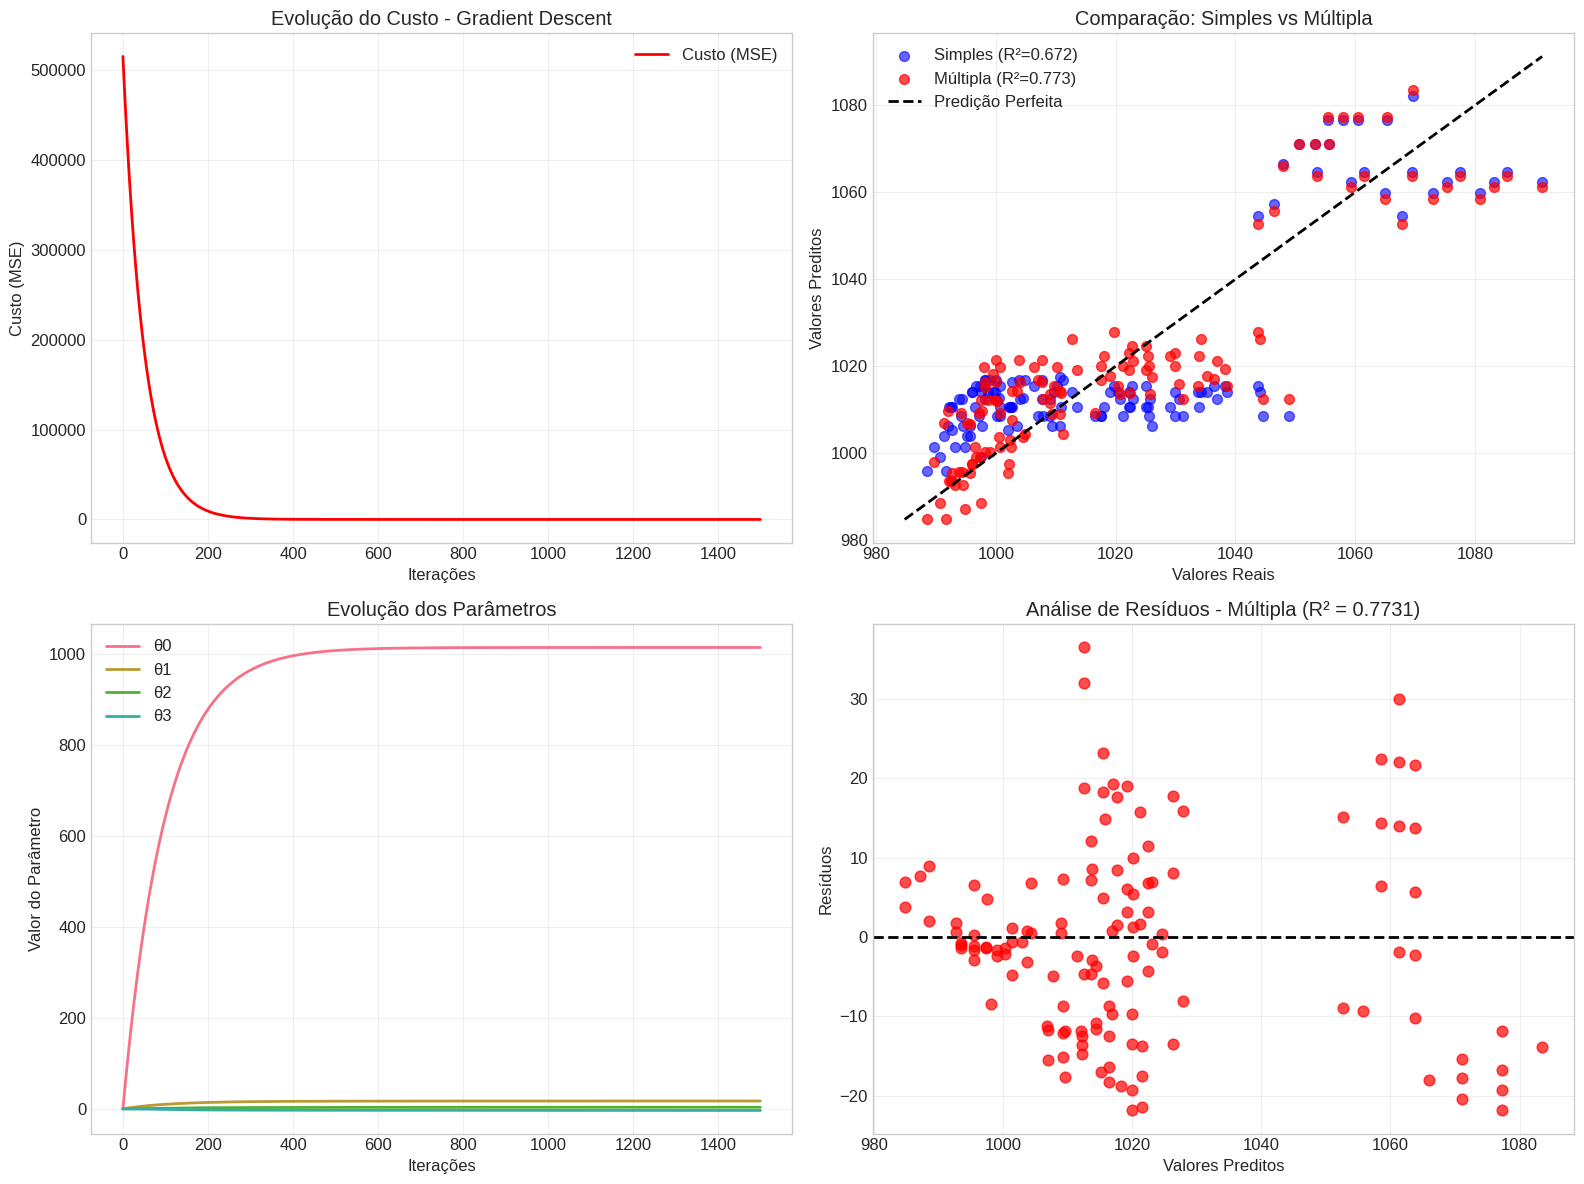

In [29]:
print("COMPARAÇÃO: REGRESSÃO SIMPLES vs MÚLTIPLA (GRADIENT DESCENT)")
print("="*70)

# Comparar resultados
print(f"{'Método':<30} {'R²':<12} {'RMSE':<12} {'MSE':<12}")
print("-"*70)
print(f"{'Simples (Direto)':<30} {R_squared:.6f}   {RMSE:.6f}   {MSE:.6f}")
print(f"{'Múltipla (Gradient Descent)':<30} {R_squared_multi:.6f}   {RMSE_multi:.6f}   {MSE_multi:.6f}")

# Calcular melhoria
melhoria_r2 = ((R_squared_multi - R_squared) / R_squared) * 100
melhoria_rmse = ((RMSE - RMSE_multi) / RMSE) * 100

print(f"\nMelhorias da Regressão Múltipla:")
print(f"  R²: {melhoria_r2:+.2f}%")
print(f"  RMSE: {melhoria_rmse:+.2f}%")

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Evolução do custo
axes[0,0].plot(cost_history_multi, 'r-', linewidth=2, label='Custo (MSE)')
axes[0,0].set_xlabel('Iterações')
axes[0,0].set_ylabel('Custo (MSE)')
axes[0,0].set_title('Evolução do Custo - Gradient Descent')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Comparação Predito vs Real
axes[0,1].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50, label=f'Simples (R²={R_squared:.3f})')
axes[0,1].scatter(y_test_multi, y_pred_multi, alpha=0.7, color='red', s=50, label=f'Múltipla (R²={R_squared_multi:.3f})')
min_val = min(y_test.min(), y_pred_multi.min())
max_val = max(y_test.max(), y_pred_multi.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Predição Perfeita')
axes[0,1].set_xlabel('Valores Reais')
axes[0,1].set_ylabel('Valores Preditos')
axes[0,1].set_title('Comparação: Simples vs Múltipla')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Evolução dos parâmetros principais
theta_history_array = np.array(theta_history_multi)
for i in range(min(4, theta_history_array.shape[1])):
    axes[1,0].plot(theta_history_array[:, i], label=f'θ{i}', linewidth=2)
axes[1,0].set_xlabel('Iterações')
axes[1,0].set_ylabel('Valor do Parâmetro')
axes[1,0].set_title('Evolução dos Parâmetros')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Resíduos da Regressão Múltipla
residuos_multi = y_test_multi - y_pred_multi
axes[1,1].scatter(y_pred_multi, residuos_multi, alpha=0.7, color='red', s=60)
axes[1,1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Valores Preditos')
axes[1,1].set_ylabel('Resíduos')
axes[1,1].set_title(f'Análise de Resíduos - Múltipla (R² = {R_squared_multi:.4f})')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Interpretação da Regressão Múltipla com Gradient Descent

A regressão linear múltipla com Gradient Descent utiliza otimização iterativa para encontrar os melhores coeficientes, permitindo usar várias variáveis independentes simultaneamente.

In [30]:
print("INTERPRETAÇÃO DA REGRESSÃO MÚLTIPLA COM GRADIENT DESCENT")
print("="*70)

print(f"\nAlgoritmo utilizado:")
print(f"• Função de custo: J(θ) = (1/2m) Σ(hθ(xi) - yi)²")
print(f"• Regra de atualização: θj := θj - α ∂J(θ)/∂θj")
print(f"• Taxa de aprendizado: α = {alpha_multi}")
print(f"• Iterações executadas: {num_iterations_multi}")

print(f"\nCoeficientes e suas interpretações:")
interpretacoes = [
    "Densidade base do fluido",
    "Volume da partícula 1", 
    "Volume da partícula 2",
    "Tipo de fluido base",
    "Tipo de nanopartícula"
]

for i, (var, interp) in enumerate(zip(variaveis_independentes, interpretacoes)):
    print(f"• θ{i+1} = {theta_final_multi[i+1]:.6f} ({interp})")
    if theta_final_multi[i+1] > 0:
        efeito = "aumenta"
    else:
        efeito = "diminui"
    print(f"  → Cada unidade normalizada de aumento {efeito} a densidade em {abs(theta_final_multi[i+1]):.6f} unidades")

print(f"\nDesempenho do modelo:")
if R_squared_multi >= 0.9:
    qualidade_multi = "Excelente"
elif R_squared_multi >= 0.8:
    qualidade_multi = "Muito Boa"
elif R_squared_multi >= 0.6:
    qualidade_multi = "Boa"
elif R_squared_multi >= 0.4:
    qualidade_multi = "Moderada"
else:
    qualidade_multi = "Fraca"

print(f"• R² = {R_squared_multi:.4f} ({qualidade_multi})")
print(f"• R² Ajustado = {R_squared_adj:.4f}")
print(f"• O modelo explica {R_squared_multi*100:.2f}% da variabilidade dos dados")
print(f"• Melhoria sobre modelo simples: {melhoria_r2:+.2f}%")

print(f"\nConvergência do algoritmo:")
custo_inicial = cost_history_multi[0]
custo_final = cost_history_multi[-1]
reducao_custo = ((custo_inicial - custo_final) / custo_inicial) * 100
print(f"• Custo inicial: {custo_inicial:.6f}")
print(f"• Custo final: {custo_final:.6f}")
print(f"• Redução do custo: {reducao_custo:.2f}%")

print(f"\nVantagens do Gradient Descent:")
print(f"• Escalável para grandes datasets")
print(f"• Não requer inversão de matrizes")
print(f"• Permite acompanhar a convergência")
print(f"• Flexível para diferentes funções de custo")

print(f"\nResumo final:")
print(f"1. Regressão Linear Simples: R² = {R_squared:.4f}")
print(f"2. Regressão Linear Múltipla (Gradient Descent): R² = {R_squared_multi:.4f}")
print(f"   → Melhoria: {melhoria_r2:+.2f}%")

INTERPRETAÇÃO DA REGRESSÃO MÚLTIPLA COM GRADIENT DESCENT

Algoritmo utilizado:
• Função de custo: J(θ) = (1/2m) Σ(hθ(xi) - yi)²
• Regra de atualização: θj := θj - α ∂J(θ)/∂θj
• Taxa de aprendizado: α = 0.01
• Iterações executadas: 1500

Coeficientes e suas interpretações:
• θ1 = 17.258568 (Densidade base do fluido)
  → Cada unidade normalizada de aumento aumenta a densidade em 17.258568 unidades
• θ2 = 3.508847 (Volume da partícula 1)
  → Cada unidade normalizada de aumento aumenta a densidade em 3.508847 unidades
• θ3 = -3.508847 (Volume da partícula 2)
  → Cada unidade normalizada de aumento diminui a densidade em 3.508847 unidades
• θ4 = 1.411141 (Tipo de fluido base)
  → Cada unidade normalizada de aumento aumenta a densidade em 1.411141 unidades
• θ5 = 4.411737 (Tipo de nanopartícula)
  → Cada unidade normalizada de aumento aumenta a densidade em 4.411737 unidades

Desempenho do modelo:
• R² = 0.7731 (Boa)
• R² Ajustado = 0.7640
• O modelo explica 77.31% da variabilidade dos dados